<a href="https://colab.research.google.com/github/martuscellifaria/FluidsAcousticsHeat/blob/master/2D_Helmholtz_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2D Homogeneous Helmholtz Equation**
The objective of this notebook is to obtain a solution to the 2D Homogeneous Helmholtz equation. It is very similar to the Laplace Equation solving procedure and has a broad application in aeroacoustics.

## **1 Define libraries**
Again and again and again and again...

In [18]:
import numpy as np
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from numpy.lib import scimath as sm

## **2 Callable function definitions**
In this step, the plot and the solution algorithm will be defined.

## **2.1 2D plot function**

In [19]:
def plot2D(x, z, p):
  fig = plt.figure()
  X, Z = np.meshgrid(x, z)
  plt.contourf(X, Z, p, 100, cmap='jet')
  plt.title("Pressure distribution in a 2D surface")
  plt.colorbar(label='P [Pa]')
  plt.xlabel('x [m]')
  plt.ylabel('z [m]')
  #plt.grid(which='major')
  #plt.grid(which='minor')
  plt.show()

## **2.2 Helmholtz equation algorithm**

In [20]:
def helmholtz2d(p, z, dx, dz, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dz**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dz**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        ((2 * (dx**2 + dz**2)))-(kappa*dx*dz)**2)
        
        
        p[:, 0] = 0  # p = 0 @ x = 0
        p[:, -1] = 100  # p = z @ x = 2
        p[0, :] = p[1, :] + C*dz*abs(np.exp(-1j*kx_bar_star*x[:]))  # dp/dz = 0 @ z = 0
        
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))
     
    return p

## **3 Calculation setup**

In [37]:
##Preamble: Aerodynamics/Aeroacoustics
b = 0.05 #half-chord
f = 100 #Hz
omega = 2*np.pi*f #rad/s
U = 19 #m/s
c_0 = 340
M = U/c_0
beta = np.sqrt(1-M**2)
kx = omega/U
kx_bar = kx*b
kx_bar_star = kx_bar/(beta**2)
mu = kx_bar_star*M
kappa = np.sqrt(mu**2)
w_0 = 30
##variable declarations
Lx = 2*b
Lz = 2*b
C = -w_0*b/beta
nx = 61
nz = 61
dx = Lx / (nx - 1)
dz = Lz / (nz - 1)


##initial conditions
p = np.zeros((nx, nz))  # create a XxY vector of 0's


##plotting aids
x = np.linspace(0, Lx, nx)
z = np.linspace(0, Lz, nz)

##boundary conditions
p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = 100  # p = z @ x = 2
p[0, :] = p[1, :] + C*dz  # dp/dz = 0 @ z = 0
#p[-1, :] = p[-2, :]  # dp/dz = 0 @ z = 1

## **4 Plotting the pseudoinitial conditions**
That means: matrix of zeros with the boundary conditions applied.

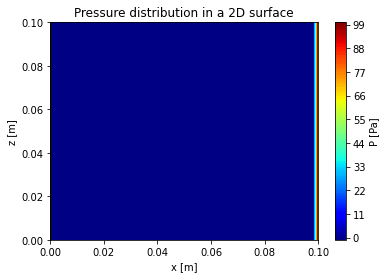

In [38]:
plot2D(x, z, p)

## **5 Calling the 2D Homogeneous Helmholtz equation algorithm**

In [39]:
p = helmholtz2d(p, z, dx, dz, 1e-4)

## **6 Plotting the 2D solution of the Homogeneous Helmholtz equation**

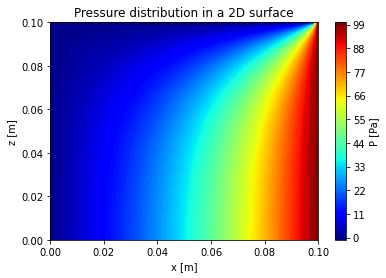

In [40]:
plot2D(x, z, p)